# CSE 151A Group Project: Tree Models

In [1]:
# All of our imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform, poisson
import xgboost as xgb
import warnings

C:\Users\Home\AppData\Local\Temp\ipykernel_24032\2155175530.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Run to suppress warnings when running code

In [2]:
warnings.filterwarnings('ignore')

First, we must get our processed data to train the model

In [3]:
input_df = pd.read_csv('processed_input.csv')
output_df = pd.read_csv('processed_output.csv')
display(input_df)
display(output_df)

,host_since,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,price,minimum_nights,maximum_nights,...,Bathroom essentials,Baby safety gates,Bread maker,Clothing storage,Full kitchen,Fireplace guards,Sound system,EV charger,Outdoor furniture,Lake access
0,0.735956,0.0,0.000759,1.0,0.0,0.066667,0.0,0.002761,0.001002,0.013138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.577049,0.0,0.000759,1.0,1.0,0.066667,0.0,0.006653,0.001002,0.013138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.523716,0.0,0.000759,1.0,0.0,0.066667,0.0,0.004852,0.001002,0.013138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.573115,0.0,0.000759,1.0,1.0,0.066667,0.0,0.003052,0.001002,0.013138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.493989,0.0,0.000759,1.0,0.0,0.066667,0.0,0.003168,0.001002,0.013138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168318,0.467760,0.0,0.000759,1.0,1.0,0.066667,0.0,0.006653,0.000000,0.000070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168319,0.577486,0.0,0.000759,1.0,1.0,0.066667,0.0,0.003168,0.006012,0.000164,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168320,0.704044,0.0,0.000759,1.0,1.0,0.066667,0.0,0.002587,0.005010,0.000339,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168321,0.447213,0.0,0.000759,1.0,1.0,0.066667,0.0,0.005782,0.002004,0.000199,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,review_scores_rating
0,100.0
1,100.0
2,100.0
3,100.0
4,100.0
...,...
168318,100.0
168319,100.0
168320,100.0
168321,100.0


It is important to separate our data into testing, validation and training data, we will have a testing proportion of 0.2 and a validation proportion of 0.2

In [4]:
X_train, X_test, y_train, y_test = train_test_split(input_df,output_df, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, random_state=42)

print(f'Training data shapes: {X_train.shape}, {y_train.shape}')
print(f'Validation data shapes: {X_val.shape}, {y_val.shape}')
print(f'Test data shape: {X_test.shape}, {y_test.shape}')

Training data shapes: (107726, 247), (107726, 1)
Validation data shapes: (26932, 247), (26932, 1)
Test data shape: (33665, 247), (33665, 1)


Let's start off by just putting the data into a linear regression model with no other changes to the input data, we will use mean squared error as our loss function due to this being a regression problem

In [6]:
decision_tree_model=DecisionTreeRegressor()
decision_tree_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [7]:
# Show our starting off point for error
yhat_train = decision_tree_model.predict(X_train)
train_error = mean_squared_error(y_train,yhat_train)
print('Training Error:',train_error)

yhat_test = decision_tree_model.predict(X_test)
test_error = mean_squared_error(y_test,yhat_test)
print('Testing Error:',test_error)

yhat_val = decision_tree_model.predict(X_val)
val_error = mean_squared_error(y_val,yhat_val)
print('Validation Error:',val_error)

Training Error: 0.7772087016686742
Testing Error: 188.78415467461062
Validation Error: 177.90688976487306


Looking at these error values, we can see that our decision tree model is servely overfitting and that the testing error is way to high. Let's do some hyperparameter tuning to get these error values under control

In [8]:
parameters = {'criterion':['friedman_mse','squared_error'],
              'max_depth':np.arange(1,15).tolist()[0::2],
              'min_samples_split':np.arange(2,11).tolist()[0::2],
              'max_leaf_nodes':np.arange(3,20).tolist()[0::2]}
tuning_model=GridSearchCV(decision_tree_model,parameters,scoring='neg_mean_squared_error',cv=10,verbose=0, n_jobs=1)

In [ ]:
tuning_model.fit(X_train,y_train)

In [13]:
tuning_model.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 7,
 'max_leaf_nodes': 19,
 'min_samples_split': 2}

In [15]:
tuned_decision_tree_model = DecisionTreeRegressor(max_depth=7,max_leaf_nodes=19, min_samples_split=2, criterion='friedman_mse')
tuned_decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=7, max_leaf_nodes=19)

In [17]:
# Show our starting off point for error
yhat_train = tuned_decision_tree_model.predict(X_train)
train_error = mean_squared_error(y_train,yhat_train)
print('Training Error:',train_error)

yhat_test = tuned_decision_tree_model.predict(X_test)
test_error = mean_squared_error(y_test,yhat_test)
print('Testing Error:',test_error)

yhat_val = tuned_decision_tree_model.predict(X_val)
val_error = mean_squared_error(y_val,yhat_val)
print('Validation Error:',val_error)

Training Error: 91.1911685186354
Testing Error: 91.03768249546283
Validation Error: 88.58676438078393


After doing hyperparameter tuning, our model does not overfit anymore. However, the error is still not satisfactory. Let's see if we can get a lower loss using ensemble learning with Random Forests

In [10]:
#Random Forest Model
param_grid = {
    'n_estimators': [100, 200, 300],  # Increasing the number of trees might help improve model stability.
    'max_depth': [None, 10, 20],  # None allows trees to grow as much as needed, while also testing limited growth.
    'min_samples_split': [2, 5, 10, 15],  # Testing a wider range to find a good balance.
    'min_samples_leaf': [1, 3, 6],  # Increasing the minimum number of samples per leaf can help regularize the model.
}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 3, 6],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [11]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 6,
 'min_samples_split': 10,
 'n_estimators': 300}

In [14]:
tuned_grid_search_model = RandomForestRegressor(max_depth=None, min_samples_leaf=6, min_samples_split=10, n_estimators=300)
tuned_grid_search_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=6, min_samples_split=10,
                      n_estimators=300)

In [15]:
#print train, test, and validation errors
yhat_train = tuned_grid_search_model.predict(X_train)
train_error = mean_squared_error(y_train,yhat_train)
print('Training Error:',train_error)

yhat_test = tuned_grid_search_model.predict(X_test)
test_error = mean_squared_error(y_test,yhat_test)
print('Testing Error:',test_error)

yhat_val = tuned_grid_search_model.predict(X_val)
val_error = mean_squared_error(y_val,yhat_val)
print('Validation Error:',val_error)

Training Error: 51.40654148536753
Testing Error: 86.43469976504835
Validation Error: 85.22374474058464


After analyzing the Random Forest model, it seems that the loss values have improved a decent amount but we can now see that it's overfitting slightly. Let's see if we can improve this using another tree model: XGBoost

In [5]:
xgbmodel = xgb.XGBRegressor(learning_rate= 0.1, max_depth= 7, n_estimators= 200, 
                         colsample_bytree= 0.7, subsample = 0.9, gamma=0)
xgbmodel.fit(
    X_train, y_train, 
    eval_set=[(X_train, y_train), (X_test,y_test), (X_val, y_val)], 
    eval_metric="rmse", 
    verbose=False
)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [6]:
yhat_train = xgbmodel.predict(X_train)
train_error = mean_squared_error(y_train,yhat_train)
print('Training Error:',train_error)

yhat_test = xgbmodel.predict(X_test)
test_error = mean_squared_error(y_test,yhat_test)
print('Testing Error:',test_error)

yhat_val = xgbmodel.predict(X_val)
val_error = mean_squared_error(y_val,yhat_val)
print('Validation Error:',val_error)

Training Error: 68.50379526455089
Testing Error: 86.27997822127385
Validation Error: 84.80189967469147


This is the best result we've gotten so far, so we'll use XGBoost as our model for this milestone.

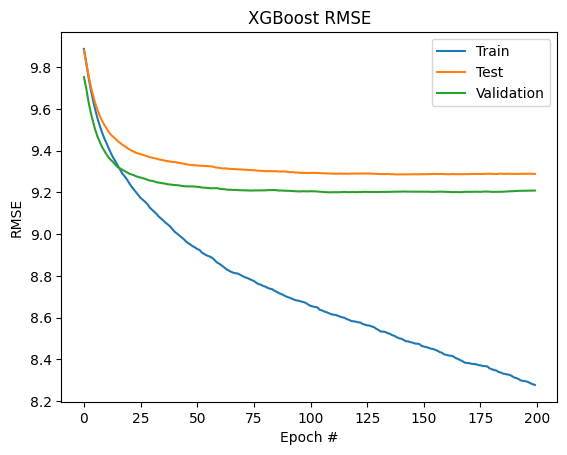

In [7]:
# Extracting the evaluation results for plotting
results = xgbmodel.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# Plotting
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.plot(x_axis, results['validation_2']['rmse'], label='Validation')
ax.legend()

plt.ylabel('RMSE')
plt.xlabel('Epoch #')
plt.title('XGBoost RMSE')
plt.show()

### Conclusion

Our initial model, Decision Tree, produced a non-impressive result test error around 91, which had so significant improvement above our first model. Our next model, Random Forests, produced improved results but was obviously overfitted due to the training error being way smaller than the testing and validation error. Our third and final model, XGBoost, produced the best results with only slight overfitting.